# Load

In [1]:
using Plots
using NBInclude
using LaTeXStrings
using IterTools

In [2]:
@nbinclude("../L2/List2.ipynb");

  0.022834 seconds (81.73 k allocations: 3.996 MiB, 94.71% compilation time)
  0.009019 seconds (4.42 k allocations: 218.344 KiB, 86.60% compilation time)
  0.010142 seconds (6.23 k allocations: 327.625 KiB, 88.11% compilation time)
  1.174556 seconds
  1.176178 seconds
  1.174218 seconds
  0.000107 seconds (3.08 k allocations: 129.031 KiB)
  0.000266 seconds (6.15 k allocations: 258.031 KiB)
  0.000752 seconds (12.29 k allocations: 516.031 KiB)
  0.002352 seconds (24.58 k allocations: 1.008 MiB)
  0.010537 seconds (49.16 k allocations: 2.016 MiB)
  0.042518 seconds (98.31 k allocations: 4.031 MiB)
  0.171027 seconds (196.61 k allocations: 7.563 MiB)
  2.003255 seconds (393.22 k allocations: 15.125 MiB)
  0.214313 seconds (106 allocations: 42.023 MiB, 64.08% gc time)
  0.184485 seconds (114 allocations: 88.359 MiB, 7.15% gc time)
  0.524296 seconds (124 allocations: 182.437 MiB, 32.10% gc time)
  0.342025 seconds (126 allocations: 182.066 MiB, 5.08% gc time)
  4.373930 seconds (162 all

[ Info: Saved animation to C:\Git\Numeryczne-Teoretyczne\L3\tmp.gif


# Tasks

## Zad 1


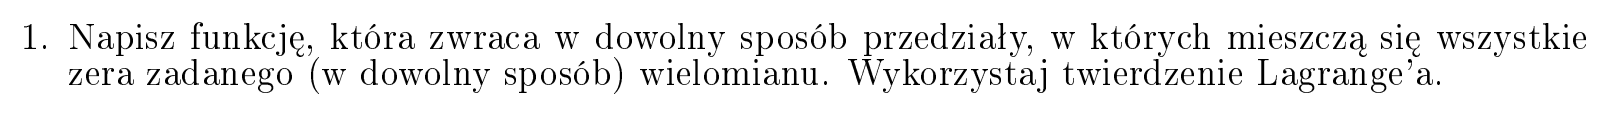

### Poly

In [3]:
using LaTeXStrings
remove_leading_zeros(arr)=begin
    first_non_zero_index = findlast(x -> x != 0, arr)
    return first_non_zero_index === nothing ? [0] : arr[1:first_non_zero_index]
end

remove_leading_zeros (generic function with 1 method)

In [4]:
const coef_acc=1e-14

1.0e-14

In [5]:
mutable struct Poly
    an::Vector{Float64}
    deg::Int
    Poly(tmp::Vector)= begin
        tmp[abs.(tmp) .< coef_acc] .=0
        tmp=remove_leading_zeros(tmp)
        new(tmp, length(tmp)-1) |> new_deg
    end
    Poly(tmp::Real)= begin
        tmp< coef_acc ? tmp=0 : nothing
        new([tmp], 0) |> new_deg
    end
    Poly(args...)= begin
        if length(args)==0
            new([0], 1) |> new_deg
        else
            tmp=[args...]
            tmp[abs.(tmp) .< coef_acc] .=0
            tmp=remove_leading_zeros(tmp)
            new(tmp, length(tmp)-1) |> new_deg
        end
    end
end

In [6]:
new_deg(poly::Poly)=begin
    poly.an[abs.(poly.an) .< 1e-12] .==0
    poly.an=remove_leading_zeros(poly.an)
    poly.deg= poly.an==[0] ? 0 : length(poly.an)-1;
    poly
end

new_deg (generic function with 1 method)

In [7]:
remove_leading_zeros(poly::Poly)=begin
    first_non_zero_index = findlast(x -> x != 0, poly.an)
    return first_non_zero_index === nothing ? [0] : poly.an[1:first_non_zero_index]
end

remove_leading_zeros (generic function with 2 methods)

In [8]:
Poly().an

1-element Vector{Float64}:
 0.0

In [9]:
Poly(1).an

1-element Vector{Float64}:
 1.0

In [10]:
Poly(1,2).an

2-element Vector{Float64}:
 1.0
 2.0

In [11]:
Poly([1,2]).an

2-element Vector{Float64}:
 1.0
 2.0

In [12]:
derivate(poly::Poly)=begin
    tmp=poly.an[2:end]
    for i in 1:length(tmp)
       tmp[i]*= i
    end
    tmp=Poly(tmp...)
    new_deg(tmp)
    tmp
end

derivate (generic function with 1 method)

In [13]:
derivate(Poly(1,2,3,4))

Poly([2.0, 6.0, 12.0], 2)

In [14]:
Base.length(poly::Poly)=length(poly.an)

In [15]:
Base.lastindex(f::Poly) = f.deg

In [16]:
Base.getindex(poly::Poly,i)=poly.an[i+1]
Base.getindex(poly::Poly,range::UnitRange)=[poly.an[i+1] for i in range]
Base.getindex(poly::Poly,range::StepRange)=[poly.an[i+1] for i in range]

In [17]:
Base.setindex!(poly::Poly,x,i)=begin
    if i<length(poly)
        poly.an[i+1]=x
    else
        append!(poly.an, zeros(i-length(poly)+1))
        poly.an[end]=x
    end
end

In [18]:
tmp=Poly(1,2,3)

Poly([1.0, 2.0, 3.0], 2)

In [19]:
(f::Poly)(x) = begin
    tmp=0
    for i in 0:length(f)-1
        tmp+=f[i]*x^i
    end
    tmp
end

In [20]:
Base.show(io::IO, ::MIME"text/latex", poly::Poly) = begin
    tmp=poly[0]!=0 ? "  $(poly[0])" : " "
    if length(poly)>1 && poly[1] != 0
        if abs(poly[1])!=1
            tmp *= poly[1] > 0 ? " + $(poly.an[1+1])\\ x" : " $(poly.an[1+1])\\ x"
        else
            tmp *= poly[1] > 0 ? " + \\ x" : " -\\ x"
        end
    end
    
    for i in 2:length(poly.an)-1
        if poly[i] != 0
            if abs(poly[i])!=1
                tmp *= poly[i] > 0 ? " + $(poly.an[i+1])\\ x^{$i}" : " $(poly.an[i+1])\\ x^{$i}"
            else
                tmp *= poly[i] > 0 ? " + \\ x^{$i}" : " -\\ x^{$i}"
            end
        end
    end
    length(tmp)>1 && tmp[3] == '+' ? tmp=tmp[4:end] : nothing
    tmp==" " ? tmp="0" : nothing
    print(io,latexstring(tmp))
end

In [21]:
tmp=Poly()

Poly([0.0], 0)

In [22]:
tmp[10]=-1

-1

In [23]:
tmp

Poly([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -1.0], 0)

In [24]:
Poly(1,2,-3,4)

Poly([1.0, 2.0, -3.0, 4.0], 3)

In [25]:
Poly(1,2,-3,4)(2)

25.0

In [26]:
Base.:+(f1::Poly, f2::Poly)=begin
    tmp=zeros(max(length(f1), length(f2)))
    tmp[1:length(f1)] += f1.an
    tmp[1:length(f2)] += f2.an
    tmp=Poly(tmp)
    new_deg(tmp)
    tmp
end

In [27]:
Base.:-(f1::Poly, f2::Poly)=begin
    tmp=zeros(max(length(f1), length(f2)))
    tmp[1:length(f1)] += f1.an
    tmp[1:length(f2)] -= f2.an
    tmp=Poly(tmp)
    new_deg(tmp)
end

In [28]:
Base.:-(f::Poly)= Poly() - f

In [29]:
(Poly(1,2,3)+Poly(2,3,-3)).deg

1

In [30]:
Poly(1,2,3)+Poly(2,3,-3)

Poly([3.0, 5.0], 1)

In [31]:
Poly(1,2,3)-Poly(1,3,4)

Poly([0.0, -1.0, -1.0], 2)

In [32]:
Base.:*(a::Real, f::Poly)=begin
    Poly(a.*f.an) |> new_deg
end

Base.:*(f::Poly, a::Real)=begin
    Poly(a.*f.an) |> new_deg
end

In [33]:
2*Poly(3,2)

Poly([6.0, 4.0], 1)

In [34]:
Base.:*(f1::Poly, f2::Poly)=begin
    res=zeros(length(f1)*length(f2))
    for i in 1:length(f1)
        tmp=f2 * f1[i-1]
        if tmp.an!=[0]
            res[i:length(f2)+i-1] += tmp.an
        end
    end
        Poly(res) |> new_deg
end

In [35]:
Poly(1,2) * Poly(-4)

Poly([0.0], 0)

In [36]:
Poly(1,2,0,1) * Poly(1,2,3,4)

Poly([1.0, 4.0, 7.0, 11.0, 10.0, 3.0, 4.0], 6)

In [37]:
Poly(1).an

1-element Vector{Float64}:
 1.0

In [38]:
Base.:/(f::Poly, a::Real)=begin
    a!=0 ? Poly(1/a.*f.an) |> new_deg : Error("Nie dziel przez zero")
end

In [39]:
Base.:/(f::Poly, g::Poly)=begin
    res=[]
    if g.deg==0
        return [f/g[end],Poly()]
    end
    while f.deg >= g.deg
        push!(res,f[end]/g[end])
        tmp=Poly()
        tmp[f.deg-g.deg]=res[end]
        f -= tmp*g
    end
    [Poly(res[end:-1:1]),f]
end

In [40]:
Poly((Poly(1,2,3)/1e16).an)

Poly([0.0], 0)

In [41]:
Poly(1e-16,1,2,1e-16)

Poly([0.0, 1.0, 2.0], 2)

In [42]:
poly_1=Poly(1,2,3,4,8,8)
poly_2=Poly(1,2,3,4)

Poly([1.0, 2.0, 3.0, 4.0], 3)

In [43]:
tmp=poly_1/poly_2

2-element Vector{Poly}:
 Poly([-0.375, 0.5, 2.0], 2)
 Poly([1.375, 2.25, 1.125], 2)

In [44]:
tmp[1]*poly_2+tmp[2]-poly_1 #YAY!

Poly([0.0], 0)

In [45]:
inv_poly(f::Poly)=begin
    Poly(f.an[end:-1:1])
end
neg_poly(f::Poly)=begin
   Poly(f.an .* (-1).^(cumsum(ones(length(f.an))).-1)) 
end

neg_poly (generic function with 1 method)

In [46]:
@recipe plot(f::Poly)=begin
    framestyle --> :origin
    x->f(x)
end
@recipe plot(interval,f::Poly)=begin
    framestyle --> :origin
    interval, [f(x) for x in interval]
end

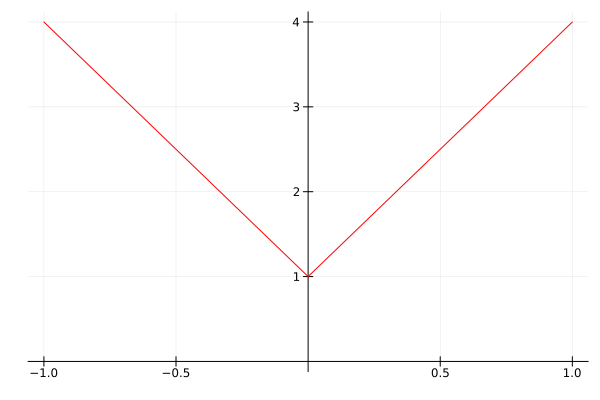

In [47]:
plot([-1,0,1], Poly(1,0,3), leg=false, c=:red)

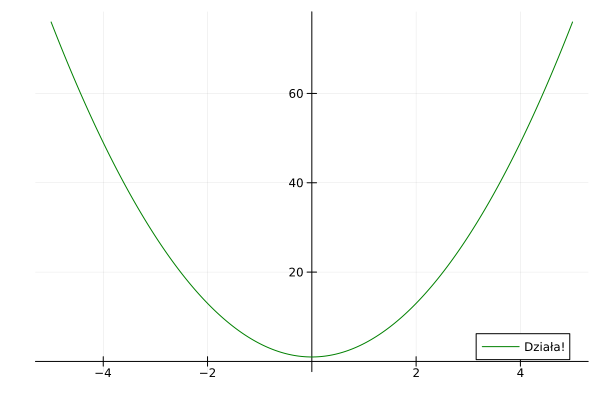

In [48]:
plot(-5:0.01:5, Poly(1,0,3), label="Działa!", c=:green)

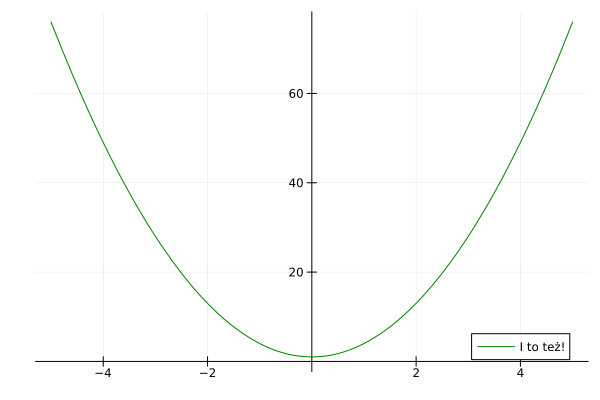

In [49]:
plot(Poly(1,0,3), label="I to też!", c=:green)

### Zadanie

In [50]:
radius(f::Poly)=begin
    tmp=f.an .<0 
    k=findlast(tmp[1:end-1])
    k != nothing ? nothing : return 0
    A=-minimum(f.an[tmp])
    1+(A/abs(f[end]))^(1/(f.deg-k+1)) # +1 bo miejsce na liście, a nie stopień
end

radius (generic function with 1 method)

In [51]:
zero_inter(f::Poly)=[-radius(neg_poly(f)),-1/radius(inv_poly(neg_poly(f))),
    1/radius(inv_poly(f)), radius(f)] 

zero_inter (generic function with 1 method)

In [84]:
neg_poly(Poly(1,-6,4,2))

Poly([1.0, 6.0, 4.0, -2.0], 3)

In [52]:
1/radius(neg_poly(Poly(1,-6,4,2)))

Inf

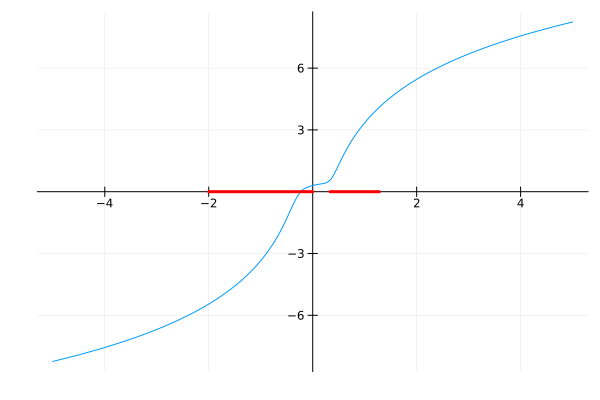

In [53]:
poly=Poly(1,3,-4,2,0,0,1,2222)
#f=Poly(9,0,-12,6,0,-1,0,1,0,2)

inter=-5:0.01:5
y=[poly(x) for x in inter]
plot(inter,sign.(y).*log10.(abs.(y).+1)) #skala logarytmiczna dla ujemnych
plot!(zero_inter(poly)[1:2],[0,0], color=:red, lw=3)
plot!(zero_inter(poly)[3:4],[0,0], color=:red, lw=3)
plot!(framestyle=:origin, leg=false, xlimit=[-5.3,5.3])

## Zad 2

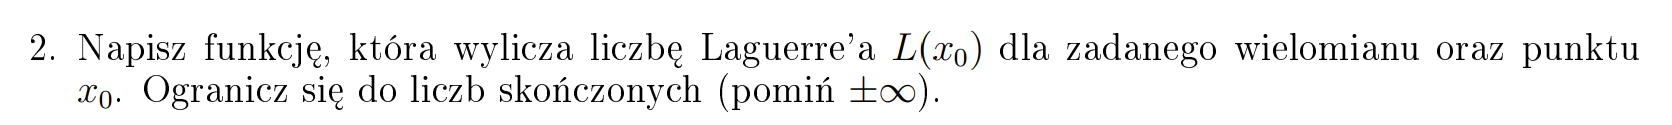

In [54]:
laguerre(f::Poly,x₀)=begin
    tmp_poly=[Poly(f[i:end]) for i in f.deg:-1:0]
    tmp=zeros(length(tmp_poly),length(x₀))
    for i in 1:size(tmp,1)
       tmp[i,:]=tmp_poly[i].(x₀) 
    end
    sum(tmp[2:end,:] .* tmp[1:end-1,:] .<0,dims=1)
end

laguerre (generic function with 1 method)

In [55]:
laguerre(Poly(12,3,4,-5),-2:2)

1×5 Matrix{Int64}:
 3  3  1  1  0

In [56]:
Poly(12,3,4,-5) #zerowe w ≈ 1.83

Poly([12.0, 3.0, 4.0, -5.0], 3)

## Zad 3

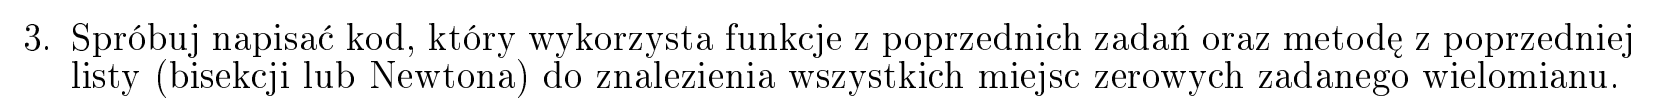

In [57]:
sturm(f::Poly)=begin
    tmp=[f,derivate(f)]
    while tmp[end].an != [0]
        push!(tmp,- (tmp[end-1]/tmp[end])[2])
    end
    tmp[1:end-1]
end

sturm (generic function with 1 method)

In [58]:
sturm(Poly(1,2,2,0,8))

5-element Vector{Poly}:
 Poly([1.0, 2.0, 2.0, 0.0, 8.0], 4)
 Poly([2.0, 4.0, 0.0, 32.0], 3)
 Poly([-1.0, -1.5, -1.0], 2)
 Poly([-50.0, -44.0], 1)
 Poly([0.5867768595041323], 0)

In [59]:
sturm_zeros(f::Poly; multi::Bool=false)=begin
    tmp=sturm(f)
    multi ? [x->xor.(partition([g(x) for g in tmp] .< 0, 2, 1)) |> sum, tmp[end].deg] :
             x->xor.(partition([g(x) for g in tmp] .< 0, 2, 1)) |> sum
end

sturm_zeros (generic function with 1 method)

In [60]:
Base.xor(X::Tuple{Bool,Bool})=xor(X[1],X[2])

In [61]:
poly=Poly(1,-6,4,2,-1)

Poly([1.0, -6.0, 4.0, 2.0, -1.0], 4)

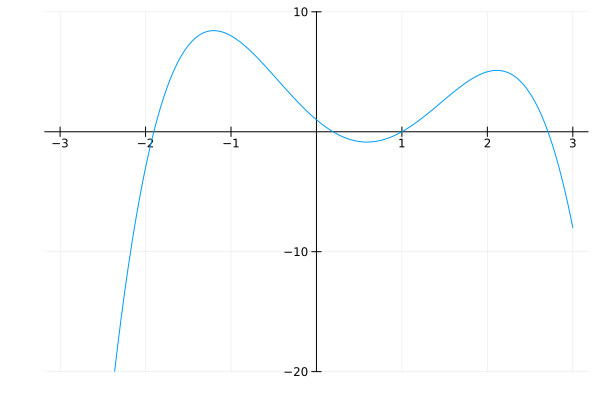

In [62]:
plot(-3:0.01:3,poly, ylim=[-20,10], leg=false)

In [63]:
tmp=sturm_zeros(poly).(-5:0.1:5);
(-5:0.1:5-0.1)[tmp[1:end-1] .!= tmp[2:end]]

4-element Vector{Float64}:
 -2.0
  0.1
  0.9
  2.7

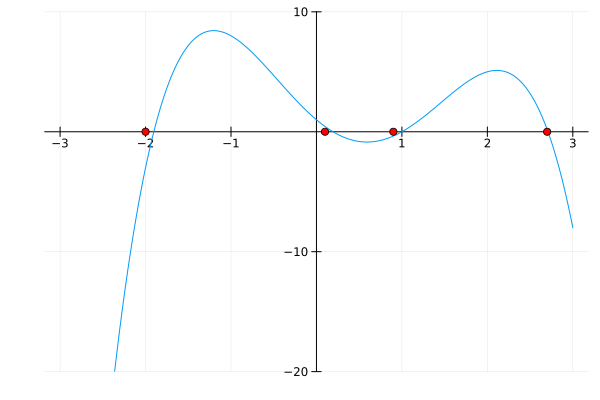

In [64]:
plot!((-5:0.1:5-0.1)[tmp[1:end-1] .!= tmp[2:end]],zeros(3), seriestype=:scatter, c=:red) #funkcja działa!

In [65]:
Base.hcat(A,B::Nothing)=A
Base.hcat(A::Nothing,B)=B
Base.hcat(A::Nothing,B::Nothing)=nothing
Base.vcat(A,B::Nothing)=A
Base.vcat(A::Nothing,B)=B
Base.vcat(A::Nothing,B::Nothing)=nothing

In [66]:
zeros_to_one(S₀::Function, a, b)=begin
    if S₀(a)-S₀(b)>1
       return hcat(zeros_to_one(S₀, a, (a+b)/2), zeros_to_one(S₀, (a+b)/2, b))
    elseif S₀(a)-S₀(b)==1
        return [a,b]
    end
end

zeros_to_one (generic function with 1 method)

In [67]:
zeros_to_one(sturm_zeros(poly), -2.5,3) #zgadza się, 4 przedziały po 1 zerze 

2×4 Matrix{Float64}:
 -2.5    -1.125  0.25   1.625
 -1.125   0.25   1.625  3.0

In [68]:
find_zero_poly(f::Poly;δ=1e-8, multiple::Bool=false)=begin
    inte=zero_inter(f)
    S₀=sturm_zeros(f)
    intervals=hcat(zeros_to_one(S₀,inte[1],inte[2]),zeros_to_one(S₀,inte[3],inte[4]))
    res=[]
    
    for (a,b) in eachcol(intervals)
        push!(res,bisek(f=f,a=a,b=b,δ=δ)[1])
    end
    !multiple ? res : hcat(res, (laguerre(f, res.-δ)-laguerre(f, res.+δ))')
    
end

find_zero_poly (generic function with 1 method)

In [69]:
find_zero_poly(poly, multiple=true)

4×2 Matrix{Any}:
 -1.90321    1
  0.193937   1
  1.0       -1
  2.70928    1

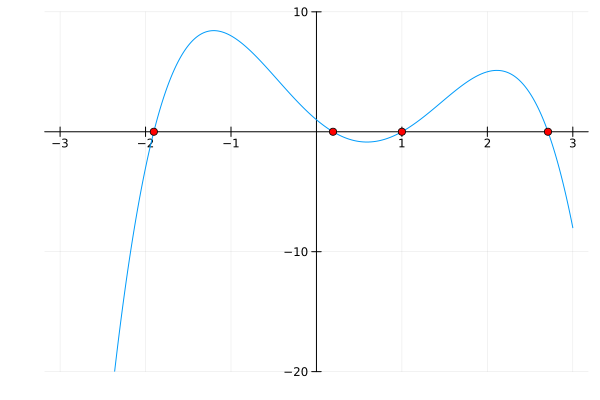

In [70]:
plot(-3:0.01:3,poly, ylim=[-20,10], leg=false)
scatter!(find_zero_poly(poly), zeros(length(find_zero_poly(poly))), c=:red)

In [71]:
find_zero_poly(poly, multiple=true)

4×2 Matrix{Any}:
 -1.90321    1
  0.193937   1
  1.0       -1
  2.70928    1

## cos

In [72]:
(0.5:0.1:3-0.1)[diff(laguerre(poly, 0.5:0.1:3)[1,:]) .>0]

3-element Vector{Float64}:
 1.0
 2.0
 2.6

In [73]:
find_zero_poly(poly, multiple=true)

4×2 Matrix{Any}:
 -1.90321    1
  0.193937   1
  1.0       -1
  2.70928    1

In [74]:
poly

Poly([1.0, -6.0, 4.0, 2.0, -1.0], 4)

In [75]:
[Poly(poly[end-i:end]) for i in 0:4]

5-element Vector{Poly}:
 Poly([-1.0], 0)
 Poly([2.0, -1.0], 1)
 Poly([4.0, 2.0, -1.0], 2)
 Poly([-6.0, 4.0, 2.0, -1.0], 3)
 Poly([1.0, -6.0, 4.0, 2.0, -1.0], 4)

In [76]:
x=11/10
#[f(x) for f in ans]

5-element Vector{Float64}:
 -1.0
  0.8999999999999999
  4.99
 -0.5109999999999997
  0.4379000000000006

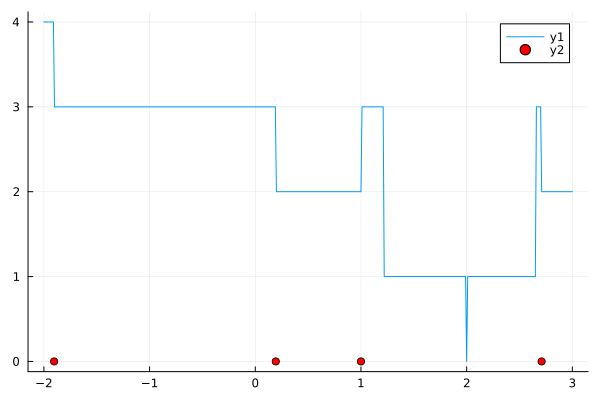

In [77]:
plot(-2:0.01:3, laguerre(poly, -2:0.010:3)[1,:])
scatter!(find_zero_poly(poly), zeros(4), c=:red)

In [78]:
laguerre(poly, 0.9:0.01:1.1)

1×21 Matrix{Int64}:
 2  2  2  2  2  2  2  2  2  2  2  3  3  3  3  3  3  3  3  3  3

In [79]:
poly

Poly([1.0, -6.0, 4.0, 2.0, -1.0], 4)

In [80]:
poly=Poly(1,-6,4,2,-1)

Poly([1.0, -6.0, 4.0, 2.0, -1.0], 4)

In [81]:
laguerre(poly,find_zero_poly(poly) .+1e-10)

1×4 Matrix{Int64}:
 4  2  2  2

In [82]:
laguerre(poly,find_zero_poly(poly) .-1e-10)

1×4 Matrix{Int64}:
 4  2  2  2